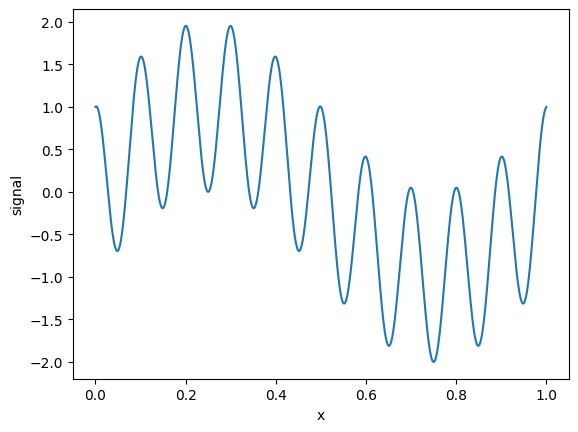

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

steps = 1000
x = np.linspace(0, 1, steps)
f = np.sin(2*np.pi*x) + np.cos(2*np.pi*10*x)
plt.xlabel("x")
plt.ylabel("signal")
plt.plot(x, f)

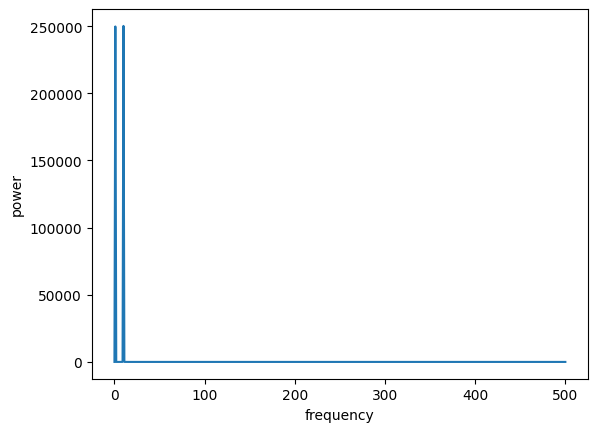

In [130]:
transform = np.fft.rfft(f)
power_spectrum = np.abs(transform)**2
freq = np.fft.rfftfreq(steps, d=1./steps)

plt.xlabel("frequency")
plt.ylabel("power")
plt.plot(freq, power_spectrum)

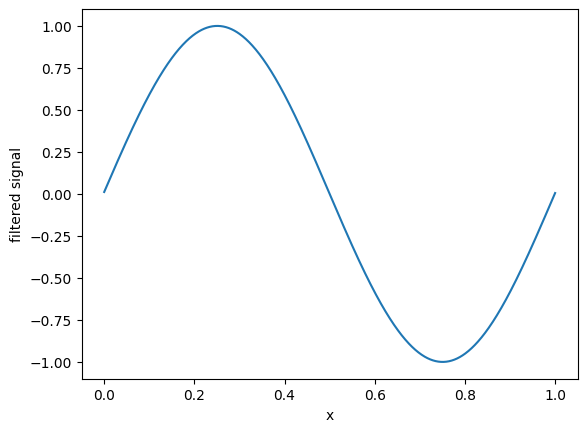

In [131]:
filtered = transform.copy()
cutoff_wavelength = 0.3
filtered[freq > (1./cutoff_wavelength)] = 0
plt.xlabel("x")
plt.ylabel("filtered signal")
plt.plot(x, np.fft.irfft(filtered))

Only the sine component with $f=1Hz,\, \lambda=1$ remains, since the cosine component $f=10Hz,\, \lambda=0.1$ is filtered out by the low-pass filter implemented by cutting out components with $\lambda < 0.3$

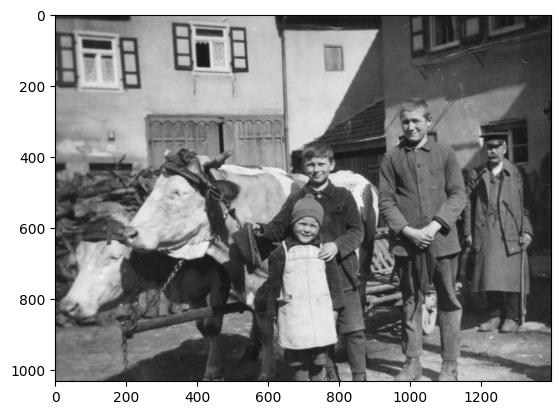

In [132]:
img = cv2.imread('picture.jpg', 0)
plt.imshow(img, cmap='gray')

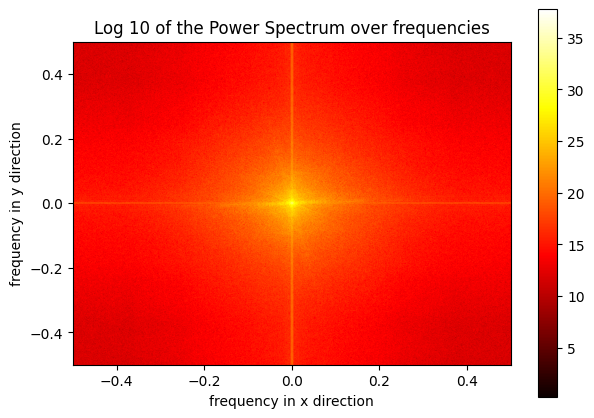

In [133]:
transform = np.fft.fft2(img);
freq = np.fft.fftfreq(transform.size).reshape(transform.shape)

power_spectrum = np.abs(transform)**2
shifted = np.log(np.fft.fftshift(power_spectrum))
plt.title("Log 10 of the Power Spectrum over frequencies")
plt.xlabel("frequency in x direction")
plt.ylabel("frequency in y direction")
plt.imshow(shifted, cmap='hot', extent=[-.5,.5,-.5,.5], aspect=transform.shape[0]/transform.shape[1])
plt.tight_layout()
plt.colorbar();

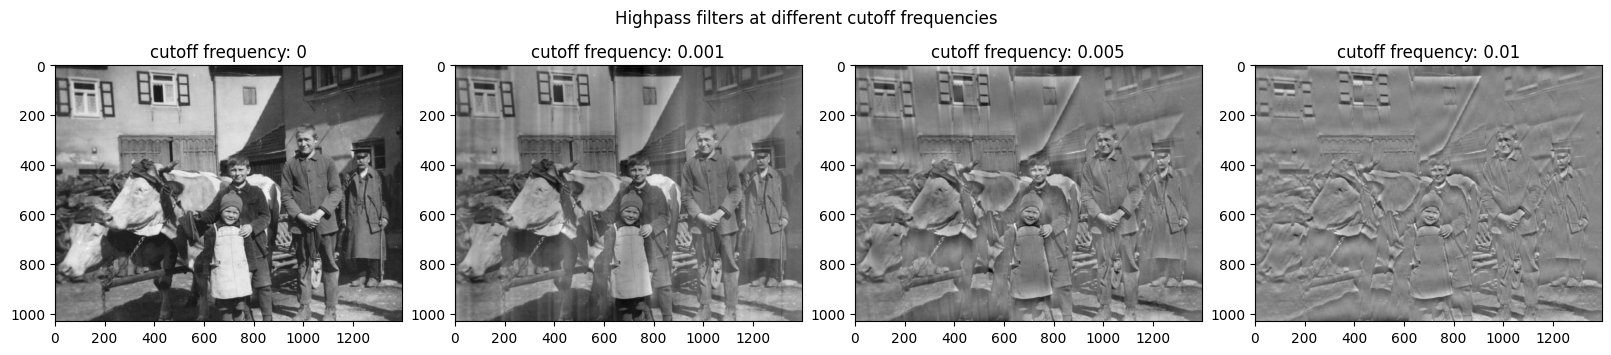

In [134]:
cutoffs = [0, 0.001, 0.005, 0.01]
f, ax = plt.subplots(1,len(cutoffs),  figsize=(len(cutoffs)*4, 3.5),  constrained_layout=True)
f.suptitle('Highpass filters at different cutoff frequencies')
for (i, cutoff) in  enumerate(cutoffs):
  filtered = transform.copy()
  filtered[np.abs(freq) <= cutoff] = 0
  ax[i].imshow(np.fft.ifft2(filtered).real, cmap='gray')
  ax[i].title.set_text("cutoff frequency: "+str(cutoff))

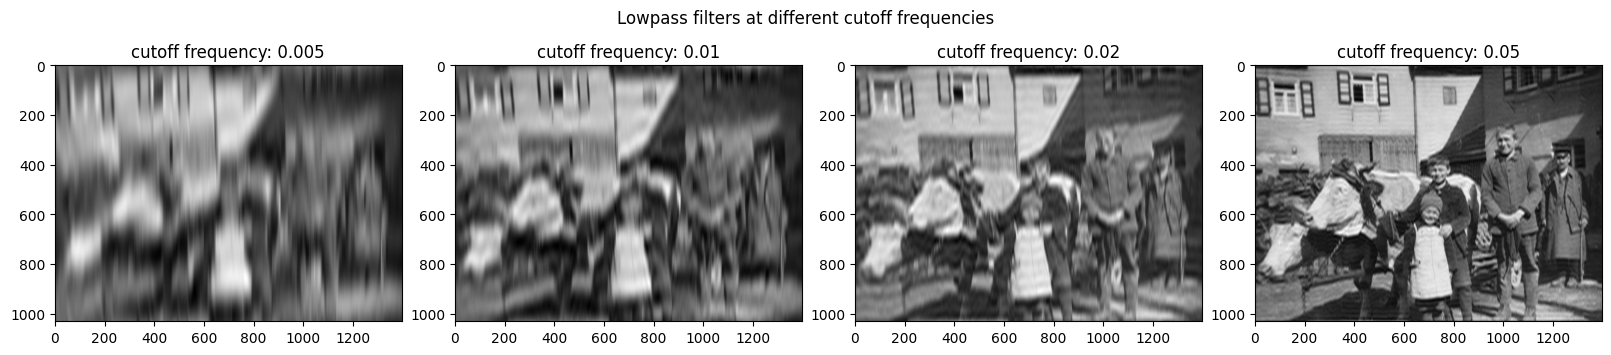

In [140]:
cutoffs = [0.005, 0.01, 0.02, 0.05]
f, ax = plt.subplots(1,len(cutoffs),  figsize=(len(cutoffs)*4, 3.5),  constrained_layout=True)
f.suptitle('Lowpass filters at different cutoff frequencies')
for (i, cutoff) in  enumerate(cutoffs):
  filtered = transform.copy()
  filtered[np.abs(freq) >= cutoff] = 0
  ax[i].imshow(np.fft.ifft2(filtered).real, cmap='gray')
  ax[i].title.set_text("cutoff frequency: "+str(cutoff))